# National Heart, Lung, and Blood Institute Mortality Study
This data set comes from the NIH's National Longitudinal Mortality Study. Since the data set is quite large, we will only look at a subsample of the data which includes information on smoking. Due to legal obligations regarding this data set, no columns or rows can be shown, and instead only summary statistics may be used. We do provide a description of the relevant variables at work.

This data set involves a particular cohort group in which smoking information was collected. In this notebook, the effects of income, smoking, education, and income will be analyzed to observe their assocations with mortality. 

The data was collected between the 1990's, up to 2005, and was intended to reflect the US population at a target date of April 1, 2000. The maximum followup period for this data was 5 years. Without any data cleaning, the data consists of $493,282$ records with $43$ features. 

In [1]:
#loading in the data set
data <- read.csv('tu.csv')

In [2]:
# rows x columns
dim(data)

[1] 493282     43

In [3]:
head(data)

record,age,race,sex,ms,hisp,adjinc,educ,pob,wt,...,tenure,citizen,health,indalg,smok100,agesmk,smokstat,smokhome,curruse,everuse
255697,46,1,1,1,3,3,8,917,336,...,2,NA,NA,1,1,NA,2,NA,22222,22222
255698,40,1,2,1,3,3,7,0,297,...,2,NA,NA,NA,2,NA,1,NA,22222,22222
255699,16,1,2,5,3,3,6,917,303,...,2,NA,NA,NA,1,NA,2,NA,22222,22222
255700,62,1,1,1,3,5,4,0,325,...,1,NA,NA,NA,1,NA,2,NA,22222,22222
255701,61,1,2,1,3,5,9,917,319,...,1,NA,NA,NA,2,NA,1,NA,22222,22222
255702,39,1,1,1,3,9,12,917,279,...,1,NA,NA,NA,2,NA,1,NA,12122,12122


### A description of the features
The data consists of $43$ features. We provide some descriptions of the data here, as well as codings. The data is fairly complete, but some columns are missing. We provide a brief description on the most relevant variables that we are interested in controlling for.

-  record: ID number pertaining to a particular person
-  hhid: Household ID number
-  age: The integer valued age of a person in the study at the time of followup
-  $\textbf{follow:}$ Length of follow up.
-  $\textbf{race:}$ Race of the person. 1 = white, 2 = black, 3 = american indian/alaskan native, 4 = asian, 5 = other nonwhite
-  $\textbf{sex:}$ Sex of the person. 1 = male, 2 = female.
-  hisp: Hispanic Origin. 1 = mexican, 2 = other hispanic, 3 = non-hispanic
-  $\textbf{adjinc:}$ Inflation adjusted income. Ordinal categorical. Amounts in dollars. 1 = 0-4,999, 2 = 5,000 - 7,499, 3 = 7,499-9,999, 4 = 10,000 - 14,999, ..., 12 = 50,000 - 59,999, 13= 60,000 - 75,000, 14 = 75,000+
-  $\textbf{povpct:}$ Income as a percent of poverty level. Ordinal categorical. Income is less than 100% of the poverty level for codes 1-3. Then is above poverty level for codes 3-21. 21 = GT 700% of poverty level. 
-  $\textbf{hhnum:}$ Number of people in household.
-  $\textbf{stater:}$ State of residence. Codes are given in a manual.
-  $\textbf{ms:}$ Marital Status. 1 = married, 2 = widowed, 3 = divorced, 4 = seperated, 5 = never married
-  educ: Highest grade completed. Numeric. 1 corresponds to no education, 14 corresponds to advanced achievement
-  wt: Adjusted weights for the records. From the documentation: "All records have been weighted to give population totals for the non-institutionalized population of the U.S. on April 1, 1983 for File 11 and File 6a, April 1, 1993 for File 6b, and April 1, 2002 for File 6c, and April 1, 2000 for File tu. Weights were obtained by raking age-sex-race group totals by state totals for each survey. Survey weights were then readjusted to the target dates  of the associated U.S. population and  accounting for the different numbers of records by survey in this each of the four files.  "
-  pob: Place of birth. Multiple codings. Codes beginning with a "9" indicate person was born in the US, 108 indicates individual born in Mexico. Other codes indicate other regions in the world, such as specific parts of Europe and Africa. 
-  tenure:  Status of home ownership. 1 = house owned by individual, 2 = house is rented by individual, 3 = house is rented via non-cash payments
-  vt: Veteran Status.  0 = not a veteran, 1 = veteran
-  citizen: Citizenship status. 1 = Native, born in US. 2 = Native, born in US controlled territory (such as Peurto Rico). 3 = Native, born abroad by US parents. 4 = Foreign born, but naturalized/citizen. 5 = Foreign born, NOT a citizen
-  $\textbf{health:}$ Response to the question "You would say your/that person's health is...?" 1 = Excellent, 2 = Very Good, 3 = Good, 4 = Fair, 5 = Poor.
-  esr: Employment Status Recode. 1 = Employed. 2 = Employed, but absent from work. 3 = Unemployed, looking for work. 4 = Disabled or otherwise unable to work. 5 = Not in labor force (student, retired, other)
- $\textbf{histype:}$ Health insurance status. 0 = Person not covered by acceptable health insurance plan. 1 = Had insurance. 
-  $\textbf{inddea}$: Death indicator. 0 = Alive. 1 = Dead.
-  $\textbf{smoke100:}$ Person has smoked 100 cigarettes in lifetime? 0 = no, 1 = yes
-  $\textbf{agesmk:}$ Given a "yes" to smoke100, gives an age of when person started smoking regularly.
-  $\textbf{smokestat:}$ Categorical variable indicating smoking status. 1 = never smoked, 2 = every day smoker, 3 = smokes some days, 4 = former smoker
-  $\textbf{smokehome:}$ Rules for smoking at home. 1 = No smoking allowed anywhere in house. 2 = Smoking allowed in some places, or at some times. 3 = smoking permitted anywhere at any time.


The following line of code simply computes the percentage of missing rows in each column. Note that "urban" and "smsast" are both entirely missing. Urban is an indicator for whether the household is located in an urban area or not, and smsast is an indicator for whether the house was located "in an SMSA or not". (Not clear what this means). 

In [4]:
apply(data, 2, function(col)sum(is.na(col))/length(col))

record          age         race          sex           ms         hisp 
0.000000e+00 0.000000e+00 2.838133e-05 0.000000e+00 5.534360e-03 2.169550e-02 
      adjinc         educ          pob           wt         hhid        hhnum 
1.010375e-02 6.079687e-03 0.000000e+00 8.899575e-04 0.000000e+00 0.000000e+00 
      reltrf          occ       majocc          ind       majind          esr 
0.000000e+00 3.334381e-01 3.334381e-01 3.333266e-01 3.333266e-01 6.864228e-03 
       urban       smsast       inddea     cause113       follow        dayod 
1.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 9.591451e-01 
        hosp        hospd        ssnyn           vt     histatus       hitype 
9.612169e-01 9.621211e-01 0.000000e+00 2.239490e-02 2.068513e-01 2.068513e-01 
      povpct       stater         rcow       tenure      citizen       health 
1.259726e-02 0.000000e+00 3.475578e-01 4.196383e-04 3.956114e-01 3.788523e-01 
      indalg      smok100       agesmk     smokstat     smokhome      curruse 
8.526705e-01 0.000000e+00 6.085626e-01 1.189989e-03 4.485284e-01 5.013359e-02 
     everuse 
5.013359e-02

### Plan for Analysis
Because our data set is relatively large (at nearly half a million samples), and only makes up a piece of the entire NIH mortality data set, we will proceed with complete case analysis. If we were interested in more generalizable inference, we would likely want to impute data by some technique, such as MICE (Multivariate Imputation by Chained Equations), as well as consider the other subsets of the mortality data set. Due to a lack of computing power (this analysis is being done on an old laptop), imputation will be foregone except in basic cases where the correct imputation choice is readily available. Columns containing information which we don't desire to control for will be dropped. Columns with largely missing data will be dropped. While this may potentially add omitted variable bias to our results, we take that risk here in order to end up with a more readily interpretable model. 

When the data has been adequately cleaned, we will estimate parameters for the variables in which we are interested. We will occasionally control for race, sex, marital status, etc. A logistic regression model will be fit to the data to estimate effect sizes on mortality. Afterwards, we will control for various parameters and fit a Generalized Random Forest to estimate the effect of various "Treatment" variables on mortality. 

We are making several assumptions here about the data we are removing. 

1) That while industry choice of employment may have an effect on mortality, we believe that income and employment status will have stronger effects, and act as a proxy for industry choice, as econometric studies have shown that income is closely associated with industry choice of employment.

2) Smokeless tobacco has a negligable effect on mortality, and since we are more interested in smoking, we remove it. The variable agesmk likely has some effect, but there isn't an obvious interpretation for how to code for individuals who have never smoked. Whether smoking is allowed at home or not may be important, but we will assume the effect size of second hand smoke is much smaller than first-hand smoke.

3) cause113: this indicates cause of death. At the moment, we are not interested in analyzing this.

4) citizen: Being a citizen in the US or not likely does not have as strong of an effect on mortality as income. And since lack of citizenship may preclude individuals from high income jobs, we can take income and proverty level as a proxy for citizenship. We remove this variable since a large proportion of entries are missing.


In [5]:
#dropping empty and needless columns
#Most of these contain information such as what day of the week the person died, whether they used smokeless tobacco
#Some columns also contain categories on what industry the person worked in. At the moment, we will not control for this.
#we also drop the smokehome, and agesmk variables as the majority of the records have missing data.
#We will make an assumption that being a citizen has no or small effect on mortality
drops <- c("urban", "dayod", "hosp", "hospd", "hitype", "rcow", "indalg", "curruse", "everuse", "majind", "occ", "majocc",
           "ind", "cause113", "smokhome", "agesmk", "esr", "smsast", 'citizen')
df <- data[,!(names(data) %in% drops)]

The next line of code simply removes any incomplete cases from the data. Unfortunately, this removes almost $200,000$ records. There is a good chance that this will introduce bias into the analysis, but since proper imputation can be a difficult problem to solve, we accept this potential bias for the time being. (And we may always come back to this and attempt imputation later).

In [6]:
df <- df[complete.cases(df),]
dim(df)

[1] 284753     24

In [7]:
#summary statistics for the cleaned data frame
summary(df)

     record            age             race            sex       
 Min.   :     1   Min.   :16.00   Min.   :1.000   Min.   :1.000  
 1st Qu.: 81975   1st Qu.:31.00   1st Qu.:1.000   1st Qu.:1.000  
 Median :169169   Median :43.00   Median :1.000   Median :2.000  
 Mean   :236315   Mean   :45.02   Mean   :1.244   Mean   :1.534  
 3rd Qu.:411552   3rd Qu.:57.00   3rd Qu.:1.000   3rd Qu.:2.000  
 Max.   :493282   Max.   :90.00   Max.   :5.000   Max.   :2.000  
       ms             hisp           adjinc            educ       
 Min.   :1.000   Min.   :1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.:1.000   1st Qu.:3.000   1st Qu.: 6.000   1st Qu.: 8.000  
 Median :1.000   Median :3.000   Median : 9.000   Median : 8.000  
 Mean   :2.207   Mean   :2.829   Mean   : 8.875   Mean   : 9.313  
 3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:12.000   3rd Qu.:11.000  
 Max.   :5.000   Max.   :3.000   Max.   :14.000   Max.   :14.000  
      pob              wt              hhid            hhnum       
 

In [8]:
#recode female as 0
df$sex[df['sex'] == 2] = 0
#create a column for white and non-white indicators, and likewise for hispanic
df$white <- as.numeric(df$race == 1)
df$hispanic <- as.numeric(df$hisp < 3)
#create a column indicating graduate from  highschool
df$highschool <- as.numeric(df$educ >= 08 )

#turn smok100 into a binary indicator
df$smok100 <- as.numeric(df$smok100 == 1)

#convert some non-ordinal columns into factors/dummy variables
#this will be important later for fitting models later
df$race <- factor(df$race)
df$hisp <- factor(df$hisp)
df$tenure <- factor(df$tenure)
df$smokstat <- factor(df$smokstat)
df$stater <- factor(df$stater)
df$ms <- factor(df$ms)
df$smokstat <- factor(df$smokstat)

In [9]:
head(df[df['smokstat'] == 4])

[1] "351500" "351504" "351505" "351506" "351507" "351512"

### Visualization of the data

We now visualize some of the data in order to have a more intuitive understanding of what the distribution of the data and the disparities between groups.

In [10]:
library(ggplot2)
library(repr)
options(repr.plot.width=4.5, repr.plot.height=3.5)

Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'repr' was built under R version 3.4.4"

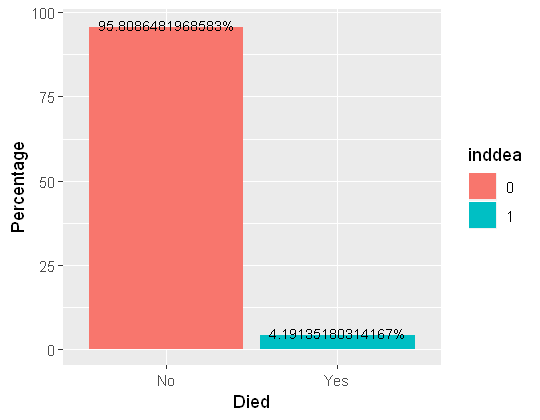

In [11]:
ggplot(data = df, aes(x = factor(inddea), fill = factor(inddea))) +
    geom_bar(aes(y = prop.table(..count..) * 100),
             position = "dodge") + 
    geom_text(aes(y = prop.table(..count..) * 100 + 0.5, 
                  label = paste0(prop.table(..count..) * 100, '%')), 
              stat = 'count', 
              position = position_dodge(1), 
              size = 3) +
scale_x_discrete(labels = c("No", "Yes"))+
labs(x = "Died", y = "Percentage", fill = "inddea")

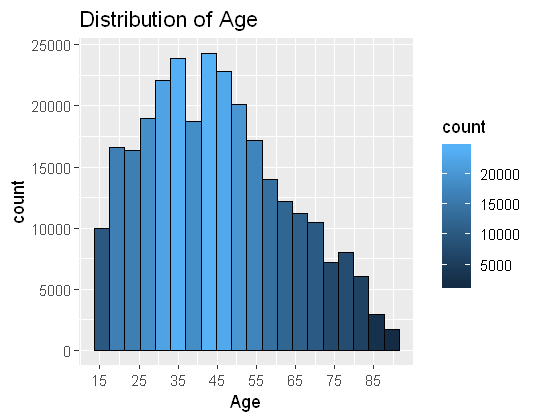

In [12]:
ggplot(df, aes(age)) +
geom_histogram( col = 'black', aes(fill = ..count..), alpha = 1, bins = 20) +
scale_x_continuous(name = "Age", breaks = seq(15, 90, by = 10))+
labs(title = 'Distribution of Age')

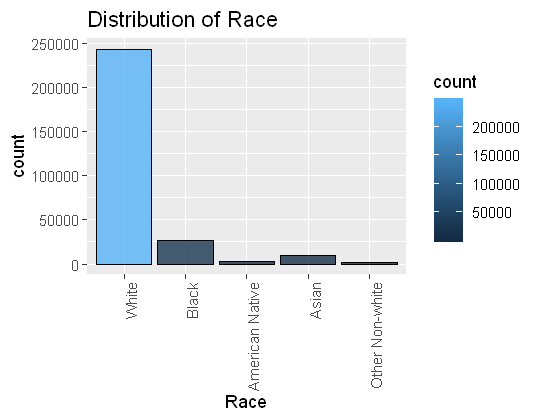

In [13]:
ggplot(df, aes(race)) +
geom_bar( col = 'black', aes(fill = ..count..), alpha = 0.8) +
scale_x_discrete(name = "Race", labels = c("White", "Black", "American Native", "Asian", "Other Non-white"))+
labs(title = 'Distribution of Race') +
theme(axis.text.x = element_text(angle = 90, hjust = 1))

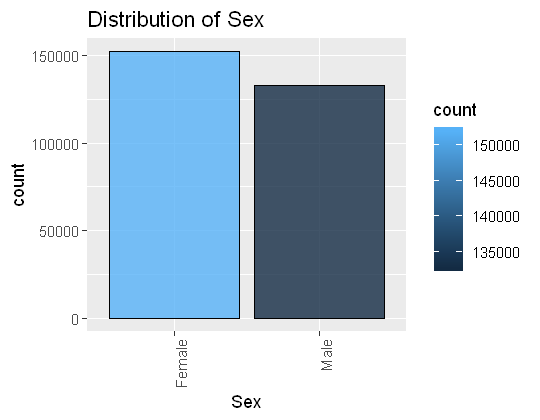

In [14]:
ggplot(df, aes(factor(sex))) +
geom_bar(col = 'black', aes(fill = ..count..), alpha = 0.8) +
scale_x_discrete(name = "Sex", labels = c("0" = "Female", "1" = "Male"))+
labs(title = 'Distribution of Sex') +
theme(axis.text.x = element_text(angle = 90, hjust = 1))


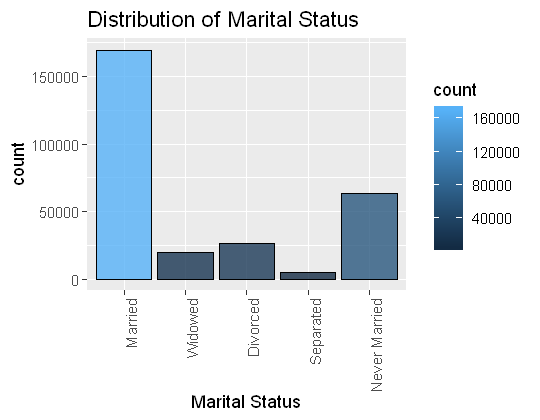

In [15]:
ggplot(df, aes(ms)) +
geom_bar( col = 'black', aes(fill = ..count..), alpha = 0.8) +
scale_x_discrete(name = "Marital Status", labels = c("Married", "Widowed", "Divorced", "Separated", "Never Married"))+
labs(title = 'Distribution of Marital Status') +
theme(axis.text.x = element_text(angle = 90, hjust = 1))

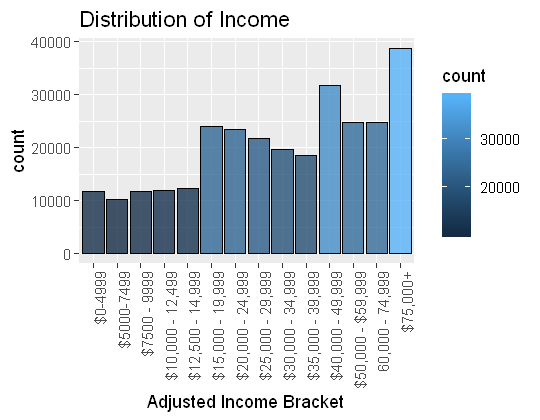

In [16]:
labelz <- c("$0-4999", "$5000-7499", "$7500 - 9999", "$10,000 - 12,499", "$12,500 - 14,999", "$15,000 - 19,999",
           "$20,000 - 24,999", "$25,000 - 29,999", "$30,000 - 34,999", "$35,000 - 39,999", "$40,000 - 49,999",
           "$50,000 - $59,999", "60,000 - 74,999", "$75,000+")

ggplot(df, aes(factor(adjinc))) +
geom_bar( col = 'black', aes(fill = ..count..), alpha = 0.8) +
scale_x_discrete(name = "Adjusted Income Bracket", labels = labelz)+
labs(title = 'Distribution of Income') +
theme(axis.text.x = element_text(angle = 90, hjust = 1))
rm(labelz)

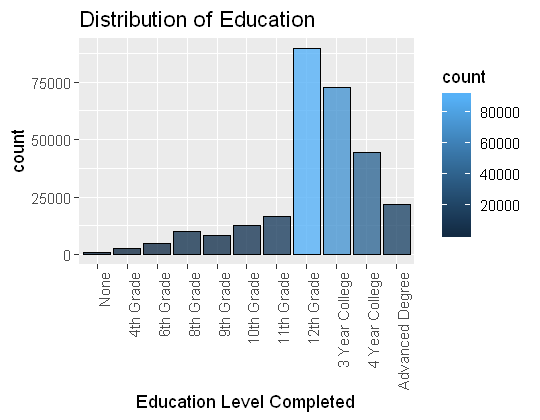

In [17]:
labelz <- c("None", "4th Grade", "6th Grade", "8th Grade", "9th Grade", "10th Grade", "11th Grade", 
           "12th Grade", "3 Year College","4 Year College", "Advanced Degree")

ggplot(df, aes(factor(educ))) +
geom_bar( col = 'black', aes(fill = ..count..), alpha = 0.8) +
scale_x_discrete(name = "Education Level Completed", labels = labelz)+
labs(title = 'Distribution of Education') +
theme(axis.text.x = element_text(angle = 90, hjust = 1))
rm(labelz)

### Parameter Estimates

We provide some simple parameter estimates of the mortality rates among different cohorts in the study. We do not control for many variables here.

The following cell creates a function to deploy a Wald Score Interval at 99% confidence. We choose a high level of confidence to reflect the large sample size, and choose the Wald Score Interval due to the mortality proportion being fairly close to 0. In this case, a normal approximation interval will have fairly bad coverage.

##### (NB: Work in progress. I want to figure out a nice way to plot all these confidence intervals.)

In [18]:

library(DescTools)
wald.int <- function(data) {
    x_1 <- sum(data)
    n_1 <- length(data)
    p <- BinomCI(x_1, n_1, conf.level =0.99, method = 'wald')
    cat("Mortality Rate and 99% Wald interval:")
    return(p)
    rm(x_1, n_1, p)
}

Warning message:
"package 'DescTools' was built under R version 3.4.4"

Now we present a couple confidence intervals using this method. Not much can be gleaned from these estimates in the way of causality, as essentially nothing is being controlled. However, some of the numbers are interesting. In particular, men have a higher mortality than women, blacks have a higher mortality than whites, and those who did not complete high school have almost twice the mortality rate as those who did. 

In [19]:
#Mortality estimate for males
wald.int(data = df$inddea[df['sex'] == 1])

Mortality Rate and 99% Wald interval:

est,lwr.ci,upr.ci
0.04681348,0.0453205,0.04830645


In [20]:
#Mortality estimate for females
wald.int(data = df$inddea[df['sex'] == 0])

Mortality Rate and 99% Wald interval:

est,lwr.ci,upr.ci
0.03762967,0.03637209,0.03888724


In [21]:
#Mortality estimate for whites
wald.int(data = df$inddea[df['race'] == 1])

Mortality Rate and 99% Wald interval:

est,lwr.ci,upr.ci
0.04211534,0.04106689,0.04316378


In [22]:
#Mortality estimate for blacks
wald.int(data = df$inddea[df['race'] == 2])

Mortality Rate and 99% Wald interval:

est,lwr.ci,upr.ci
0.04894306,0.04551333,0.05237279


In [23]:
#Mortality estimate for those who completed highschool
wald.int(data = df$inddea[df['highschool'] == 1])

Mortality Rate and 99% Wald interval:

est,lwr.ci,upr.ci
0.03418579,0.03320719,0.03516439


In [24]:
#Mortality estimate for those who did not complete highschool
wald.int(data = df$inddea[df['highschool'] == 0])

Mortality Rate and 99% Wald interval:

est,lwr.ci,upr.ci
0.07347821,0.07063821,0.07631821


### Logistic Regression Analysis

###### Under Construction

In this section, we fit a logistic regression model in order to get a better understanding of the features' associations with mortality in this study. The choice of logistic regression is clear - the outcome we are interested in is the variable "inddea", which is a binary indicator of an individual dying during the followup. We fit multiple models, starting simple, then adding complexity.

First, we relabel some of the columns in the data frame so that it is more interpretable, then we fit a logistic regression using just age, health, and gender.

In [25]:
levels(df$ms) <- c("Married", "Widowed", "Divorced", "Seperated", "Never Married")
levels(df$hisp) <- c("Mexican", "Other Hispanic", "Non-hispanic")
levels(df$race) <- c("White", "Black", "Native American", "Asian", "Other Nonwhite")
levels(df$smokstat) <- c("Never Smoked", "Every day", "Occasionally", "Former")
levels(df$tenure) <- c("Owns House", "Rents House", "Rents house/noncash")

In [27]:
fmla <- inddea ~ age + health + sex

model <- glm(fmla, data = df, family = binomial(link = "logit"))

summary(model)


Call:
glm(formula = fmla, family = binomial(link = "logit"), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5101  -0.2442  -0.1289  -0.0742   3.8842  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.2949799  0.0551122 -168.66   <2e-16 ***
age          0.0773161  0.0007371  104.89   <2e-16 ***
health       0.5149244  0.0092430   55.71   <2e-16 ***
sex          0.5167815  0.0205582   25.14   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 99082  on 284752  degrees of freedom
Residual deviance: 72104  on 284749  degrees of freedom
AIC: 72112

Number of Fisher Scoring iterations: 7


We can check how good our model fits the data. Because the positive class is extremely rare, making up less than $5$% of the data, most methods of checking fit (such as error rate and accuracy) are inappropriate. The null model of simply predicting everything into the negative class (not dying) will give an accuracy of over $95$%!

Instead, we will use the area under the Reciever Operating Characteristic curve. With this metric, a score of $1$ is a perfect model with no incorrectly predicted classes. A score of $0.50$ is equivalent to random guessing. The ROC curve is computed by testing all possible decision curve cut offs with the prediction probabilities given by the model.

Warning message:
"package 'ROCR' was built under R version 3.4.4"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.4.4"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



[1] 0.8770247

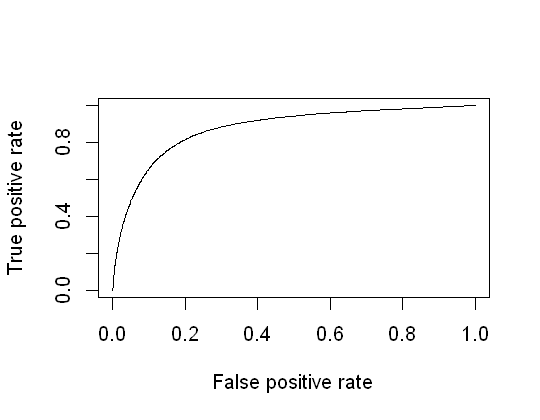

In [28]:
library(ROCR)
p <- predict(model, type="response")
pr <- prediction(p, df$inddea)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

In [29]:
#We add smoking status and whether the person smoked 100 cigarettes to the model
#the appearance of the NA for smokstat4 implies that the variable is given as a linear combination of the others
#the model must drop it for the system to be solvable, but the rest of the coefficients work
fmla <- inddea ~ age + health + sex + smok100 + smokstat

model <- glm(fmla, data = df, family = binomial(link = "logit"))

summary(model)


Call:
glm(formula = fmla, family = binomial(link = "logit"), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6341  -0.2456  -0.1236  -0.0682   3.9694  

Coefficients: (1 not defined because of singularities)
                       Estimate Std. Error  z value Pr(>|z|)    
(Intercept)          -9.6717141  0.0593000 -163.098  < 2e-16 ***
age                   0.0812641  0.0007837  103.695  < 2e-16 ***
health                0.4936017  0.0092752   53.218  < 2e-16 ***
sex                   0.4344095  0.0212158   20.476  < 2e-16 ***
smok100               0.2900891  0.0236520   12.265  < 2e-16 ***
smokstatEvery day     0.4391305  0.0312206   14.065  < 2e-16 ***
smokstatOccasionally  0.2588403  0.0619402    4.179 2.93e-05 ***
smokstatFormer               NA         NA       NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 99082  on 284752  degrees o

[1] 0.8802099

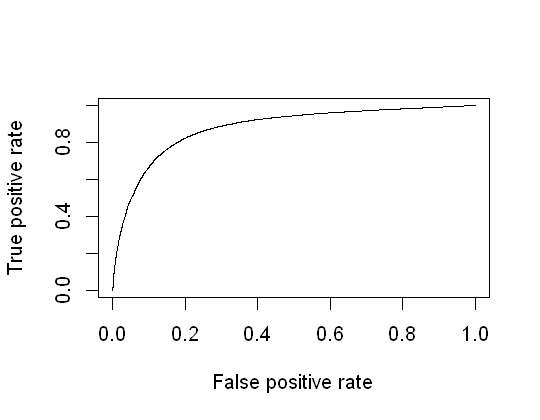

In [30]:
p <- predict(model, type="response")
pr <- prediction(p, df$inddea)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

In [31]:
#now we add adjusted income, and education
fmla <- inddea ~  age + health + sex + smok100 + smokstat + educ + adjinc

model <- glm(fmla, data = df, family = binomial(link = "logit"))

summary(model)


Call:
glm(formula = fmla, family = binomial(link = "logit"), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6628  -0.2421  -0.1229  -0.0696   3.9857  

Coefficients: (1 not defined because of singularities)
                       Estimate Std. Error  z value Pr(>|z|)    
(Intercept)          -9.287e+00  7.855e-02 -118.230  < 2e-16 ***
age                   7.950e-02  8.008e-04   99.276  < 2e-16 ***
health                4.702e-01  9.725e-03   48.354  < 2e-16 ***
sex                   4.614e-01  2.143e-02   21.532  < 2e-16 ***
smok100               2.981e-01  2.370e-02   12.577  < 2e-16 ***
smokstatEvery day     4.103e-01  3.142e-02   13.057  < 2e-16 ***
smokstatOccasionally  2.288e-01  6.205e-02    3.687 0.000227 ***
smokstatFormer               NA         NA       NA       NA    
educ                 -6.829e-05  3.648e-03   -0.019 0.985062    
adjinc               -2.842e-02  3.064e-03   -9.274  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.0

[1] 0.8808842

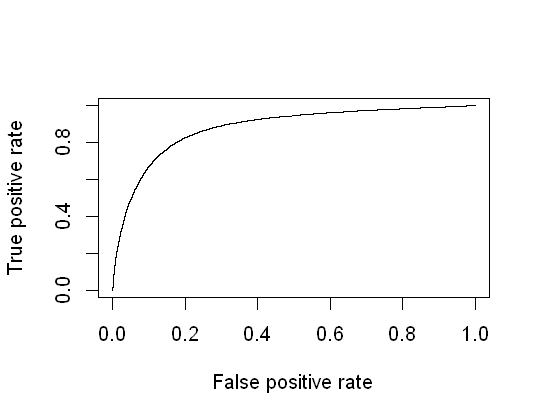

In [32]:
p <- predict(model, type="response")
pr <- prediction(p, df$inddea)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

In [33]:
#now we add in race and hispanic status and marital status. We also interact some of the strongest effects. 
fmla <- inddea ~  age + health + sex + smok100 + smokstat + educ + adjinc + race + hisp + ms

model <- glm(fmla, data = df, family = binomial(link = "logit"))

summary(model)


Call:
glm(formula = fmla, family = binomial(link = "logit"), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6831  -0.2398  -0.1219  -0.0708   3.9709  

Coefficients: (1 not defined because of singularities)
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -9.9735773  0.1002591 -99.478  < 2e-16 ***
age                   0.0787425  0.0008827  89.210  < 2e-16 ***
health                0.4758182  0.0097975  48.565  < 2e-16 ***
sex                   0.5397079  0.0225694  23.913  < 2e-16 ***
smok100               0.2967462  0.0239622  12.384  < 2e-16 ***
smokstatEvery day     0.3708082  0.0316489  11.716  < 2e-16 ***
smokstatOccasionally  0.2007904  0.0623065   3.223 0.001270 ** 
smokstatFormer               NA         NA      NA       NA    
educ                 -0.0084037  0.0037770  -2.225 0.026084 *  
adjinc               -0.0102866  0.0032604  -3.155 0.001605 ** 
raceBlack             0.0341007  0.0344563   0.990 0.

[1] 0.8828967

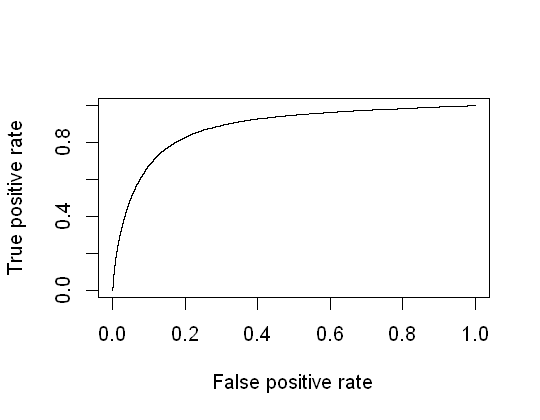

In [34]:
p <- predict(model, type="response")
pr <- prediction(p, df$inddea)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

### Generalized Random Forest

##### Under construction

In this section, we prepare and fit a Generalized Random Forest to estimate the "treatment effect" of different variables on the mortality outcome. 



In [35]:
library(grf)

Warning message:
"package 'grf' was built under R version 3.4.4"

In [39]:
library(stats)
library(splitstackshape)



Warning message:
"package 'splitstackshape' was built under R version 3.4.4"

In [40]:
train <- stratified(df, "inddea", 1000)

In [41]:
dim(train)

[1] 2000   27

In [42]:
Y <- train$inddea
W <- train$smok100
X <- model.matrix(inddea ~ health + race + age + sex, data = train)
mean(Y)

[1] 0.5

[1] 0.07476345

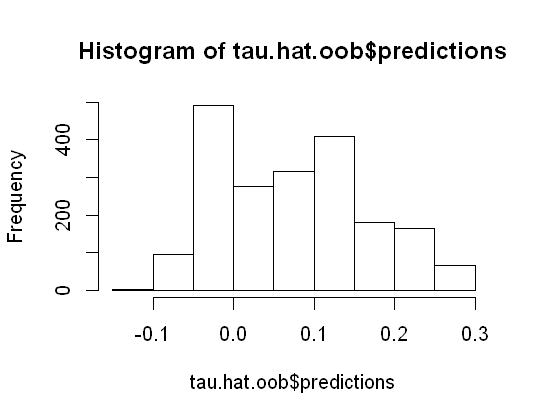

In [46]:
c.forest = causal_forest(X, Y, W)
tau.hat.oob = predict(c.forest)
hist(tau.hat.oob$predictions)
mean(tau.hat.oob$predictions)



In [47]:
average_treatment_effect(c.forest)

estimate    std.err 
0.07487763 0.01762106

In [48]:
average_partial_effect(c.forest)

estimate    std.err 
0.07597409 0.01734881